# Zengxiang Zhao

#### This project is an extension of assignment 3, to a 2D feature space and to
####  a classification problem. You will note that the accuracy of the model
####  is not that high, suggesting that the model may not be the most
####  appropriate for the proposed data.

In [1]:
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

### First, the (simulated) data.

In [2]:

# red class  =  class 0

x0 = np.random.normal(2, 1, (60, 1))
y0 = np.random.normal(1, 1, (60, 1))

# green class  =  class 1

x1 = np.random.normal(5, 1, (70, 1))
y1 = np.random.normal(4, 1, (70, 1))

# blue class  =  class 2

x2 = np.random.normal(3, 1, (80, 1))
y2 = np.random.normal(7, 1, (80, 1))

# yellow class  =  class 3

x3 = np.random.normal(8, 1, (90, 1))
y3 = np.random.normal(0, 1, (90, 1))



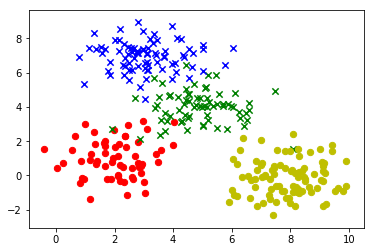

In [3]:
plt.scatter(x0, y0, c='r', marker='o', s=40)
plt.scatter(x1, y1, c='g', marker='x', s=40)
plt.scatter(x2, y2, c='b', marker='x', s=40)
plt.scatter(x3, y3, c='y', marker='o', s=40)

plt.show()

###  Combine the data into a single tensor.

In [4]:
d0 = np.hstack((x0, y0))
d1 = np.hstack((x1, y1))
d2 = np.hstack((x2, y2))
d3 = np.hstack((x3, y3))

feature_xy = np.vstack((d0, d1, d2, d3))
print(d0[0], d1[3],d2[0],d3[0])


[-0.39301352  1.56946082] [3.79976412 3.17155228] [2.4845023  6.16803259] [ 8.5149307  -0.19707869]


In [5]:
#   show shape of feature_xy
feature_xy.shape

(300, 2)

### Make one-hot encoding of the (desired) target classes

In [6]:
expected_class = np.matrix([[1., 0., 0., 0.]] * len(x0) \
                        +  [[0., 1., 0., 0.]] * len(x1) \
                        +  [[0., 0., 1., 0.]] * len(x2) \
                        +  [[0., 0., 0., 1.]] * len(x3) )

In [7]:
print(expected_class)

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


### Shuffle the data points (and corresponding classes)
### to avoid skewing the learning.

In [8]:
indices = np.arange(feature_xy.shape[0])

np.random.shuffle(indices)

feature_xy = feature_xy[indices, :]

expected_class = expected_class[indices, :]

### The usual.

In [9]:
import tensorflow as tf

### Hyper-parameters.   Play with these, to see if they make a difference.

In [10]:
learning_rate = 0.03
training_epochs = 10000

num_classes = 4
batch_size = 100

###  The feature tensor shape.

In [11]:
training_size, num_features = feature_xy.shape

###  1. Make placeholders X and Y for model inputs and corresponding desired classes.

In [12]:
X = tf.placeholder(tf.float32,shape=[None,2], name="X")
Y = tf.placeholder(tf.float32,shape=[None,4], name="target")

### 2. Make variables W and b for the weights and biases of the TensorFlow model.

In [13]:
w = tf.Variable(tf.zeros([2,4],dtype =tf.float32), name="weights")
b = tf.Variable(tf.ones([4], dtype = tf.float32), name= "bias")



###  3. Define the model, i.e. the model output.  I just call it model.
###      Use the sigmoid activation. Softmax the output, of course.

In [14]:
from tensorflow.contrib.layers import fully_connected

# predict_value = tf.matmul(X, w) + b
# sigmoid_value = tf.nn.sigmoid(predict_value)
# print(sigmoid_value)

def model(X):
    
    predict_value = tf.matmul(X, w) + b
    sigmoid_value = tf.nn.sigmoid(predict_value)
    
    
#     predict_value = fully_connected(inputs=X,num_outputs=4,
#                                     activation_fn=tf.nn.sigmoid,
#                                     weights_initializer=tf.contrib.layers.xavier_initializer(),
#                                     biases_initializer = tf.zeros_initializer())
#     logits = fully_connected(inputs = 4,num_outputs = 4, activation_fn = tf.nn.softmax)
    
    return tf.nn.softmax(sigmoid_value)
   

### 4. Define the loss (cost) function as the cross-entropy 
### between desired class and actual class computed by model.

In [15]:
xentropy = tf.losses.softmax_cross_entropy(onehot_labels=Y,
                                           logits=model(X))
loss = tf.reduce_mean(xentropy, name="loss")


### 5. Define minimizer for the loss function.

In [16]:
minimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

### 6. Make the Session object, and
###     initialize global variables.

In [17]:
#initializer
init = tf.global_variables_initializer()

#run initializer
sess = tf.Session()
sess.run(init)

### The batch training

In [18]:
for step in range(training_epochs * training_size // batch_size):
    offset = (step * batch_size) % training_size
    batch_data = feature_xy[offset:(offset + batch_size), :]
    batch_classes = expected_class[offset:(offset + batch_size)]
    err, _ = sess.run([loss, minimizer], feed_dict={X: batch_data, Y: batch_classes})
    if step % 200 == 0:
        print (step, err)


0 1.3862948
200 1.3325064
400 1.3191571
600 1.3028504
800 1.2926896
1000 1.3017459
1200 1.2891203
1400 1.2847366
1600 1.2951161
1800 1.2827557
2000 1.2807218
2200 1.2910473
2400 1.2788068
2600 1.2780442
2800 1.2880138
3000 1.2758763
3200 1.276014
3400 1.2855493
3600 1.2735119
3800 1.2743655
4000 1.2834496
4200 1.2715111
4400 1.2729689
4600 1.2816066
4800 1.2697644
5000 1.2717502
5200 1.2799556
5400 1.2682066
5600 1.2706643
5800 1.2784553
6000 1.2667955
6200 1.2696815
6400 1.2770774
6600 1.2655025
6800 1.2687813
7000 1.2758021
7200 1.2643074
7400 1.2679491
7600 1.2746147
7800 1.2631952
8000 1.2671742
8200 1.2735037
8400 1.262155
8600 1.2664485
8800 1.2724603
9000 1.2611783
9200 1.2657658
9400 1.2714777
9600 1.2602578
9800 1.2651211
10000 1.2705498
10200 1.2593883
10400 1.2645106
10600 1.2696719
10800 1.258565
11000 1.2639308
11200 1.2688397
11400 1.257784
11600 1.2633792
11800 1.2680496
12000 1.2570418
12200 1.2628533
12400 1.2672986
12600 1.2563356
12800 1.2623513
13000 1.2665836
13200

###  7. Show the weights and biases obtained for the model, after training.

In [19]:
w
learned_w = sess.run(w)
learned_b = sess.run(b)
print(learned_w)
print(learned_b)

[[-1.0328522 -1.5873857 -2.3774579  0.933737 ]
 [-0.7167093 -0.7815868  2.0786862 -2.429043 ]]
[ 4.5839257e+00 -9.9205342e-04 -4.5162287e-01 -5.9398860e-01]


###  Make a few predictions.

In [20]:
feed_dict = { X: [[8.0,-1.0]] }    # input X must be of shape [None,2]
class_vector = sess.run(model(X), feed_dict)
class_number = sess.run(tf.argmax(class_vector,1))
print(class_number)

[3]


In [21]:
feed_dict = { X: [[0.5,1.4]] }    # input X must be of shape [None,2]
class_vector = sess.run(model(X), feed_dict)
class_number = sess.run(tf.argmax(class_vector,1))
print(class_number)

[0]


In [22]:
feed_dict = { X: [[3.0,6.8]] }    # input X must be of shape [None,2]
class_vector = sess.run(model(X), feed_dict)
class_number = sess.run(tf.argmax(class_vector,1))
print(class_number)

[2]


In [23]:
feed_dict = { X: [[5.4,4.3]] }    # input X must be of shape [None,2]
class_vector = sess.run(model(X), feed_dict)
class_number = sess.run(tf.argmax(class_vector,1))
print(class_number)

[0]


### Making an accuracy node.

In [24]:
correct_prediction = tf.equal(tf.argmax(model(X), 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

### Use on the original data.

In [25]:
training_accuracy = sess.run([accuracy], feed_dict={X: feature_xy, Y: expected_class})

In [26]:
print(training_accuracy)

[0.73]


### 8. Make test data similar to the provided data above.
###     Just 10 datapoints for each of the 4 classes.

In [27]:

# red class  =  class 0

x_test_0 = np.random.normal(2, 1, (10, 1))
y_test_0 = np.random.normal(1, 1, (10, 1))

# green class  =  class 1

x_test_1 = np.random.normal(5, 1, (10, 1))
y_test_1 = np.random.normal(4, 1, (10, 1))

# blue class  =  class 2

x_test_2 = np.random.normal(3, 1, (10, 1))
y_test_2 = np.random.normal(7, 1, (10, 1))

# yellow class  =  class 3

x_test_3 = np.random.normal(8, 1, (10, 1))
y_test_3 = np.random.normal(0, 1, (10, 1))







In [28]:
d0_test = np.hstack((x_test_0, y_test_0))
d1_test = np.hstack((x_test_1, y_test_1))
d2_test = np.hstack((x_test_2, y_test_2))
d3_test = np.hstack((x_test_3, y_test_3))

feature_xy_test = np.vstack((d0_test, d1_test, d2_test, d3_test))

expected_class_test = np.matrix([[1., 0., 0., 0.]] * len(x_test_0) \
                        +  [[0., 1., 0., 0.]] * len(x_test_1) \
                        +  [[0., 0., 1., 0.]] * len(x_test_2) \
                        +  [[0., 0., 0., 1.]] * len(x_test_3) )


###  9. Run the training on the test data.

In [29]:
for epoch in range(training_epochs):
    sess.run(minimizer, feed_dict={X: feature_xy_test, Y:expected_class_test })



In [30]:

learned_w = sess.run(w)
learned_b = sess.run(b)
print(learned_w)
print(learned_b)

[[-1.0876002  -1.7262001  -2.831804    0.91567296]
 [-0.9159398  -0.96140754  2.194663   -2.6408713 ]]
[ 5.452037   -0.15519567 -0.74528027 -1.1285279 ]


###  10. Use accuracy node on your test data.

In [31]:
training_accuracy = sess.run([accuracy], feed_dict={X: feature_xy_test, Y: expected_class_test})

In [32]:
print(training_accuracy)

[0.725]
